# Brain Tumor Classification

In this notebook, I will fit the models for Brain Tumor classification. I have three different tumors Glioma, Meningioma, and Pituitary. They all have the same number of images for training. My No Tumar class is almost half the size of any tumor class. I will try to model with and without augmentation.

In [12]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


import functions

import numpy as np
np.random.seed(18)

In [2]:
# Sets for models using TensorFlow
bt_train_ds, bt_val_ds = image_dataset_from_directory(
    '../data/brain_tumor/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(208, 176),
    seed=18,
    validation_split=0.2,
    subset = 'both'
)

Found 2871 files belonging to 4 classes.
Using 2297 files for training.
Using 574 files for validation.


## Model without Augmentation

In [13]:
es = EarlyStopping(patience = 5)

model = Sequential()


model.add(layers.Input(shape=(208, 176, 3)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(.5))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(bt_train_ds, validation_data = bt_val_ds, epochs=50, callbacks = [es])

Epoch 1/50
36/36 [==============================] - 30s 788ms/step - loss: 1.5933 - accuracy: 0.3809 - val_loss: 1.3807 - val_accuracy: 0.5836
Epoch 2/50
36/36 [==============================] - 29s 810ms/step - loss: 1.3471 - accuracy: 0.4697 - val_loss: 1.2342 - val_accuracy: 0.6167
Epoch 3/50
36/36 [==============================] - 30s 818ms/step - loss: 1.2466 - accuracy: 0.5150 - val_loss: 1.0538 - val_accuracy: 0.6568
Epoch 4/50
36/36 [==============================] - 29s 813ms/step - loss: 1.1399 - accuracy: 0.5834 - val_loss: 0.9690 - val_accuracy: 0.7631
Epoch 5/50
36/36 [==============================] - 29s 797ms/step - loss: 1.0810 - accuracy: 0.6017 - val_loss: 0.8716 - val_accuracy: 0.7160
Epoch 6/50
36/36 [==============================] - 28s 774ms/step - loss: 1.0680 - accuracy: 0.6134 - val_loss: 0.9096 - val_accuracy: 0.7143
Epoch 7/50
36/36 [==============================] - 29s 799ms/step - loss: 1.0417 - accuracy: 0.6147 - val_loss: 0.8642 - val_accuracy: 0.7648

Epoch 10/50
36/36 [==============================] - 30s 820ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.5508 - val_accuracy: 0.8868

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 208, 176, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 206, 174, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 103, 87, 32)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 101, 85, 32)       9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 42, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 67200)            

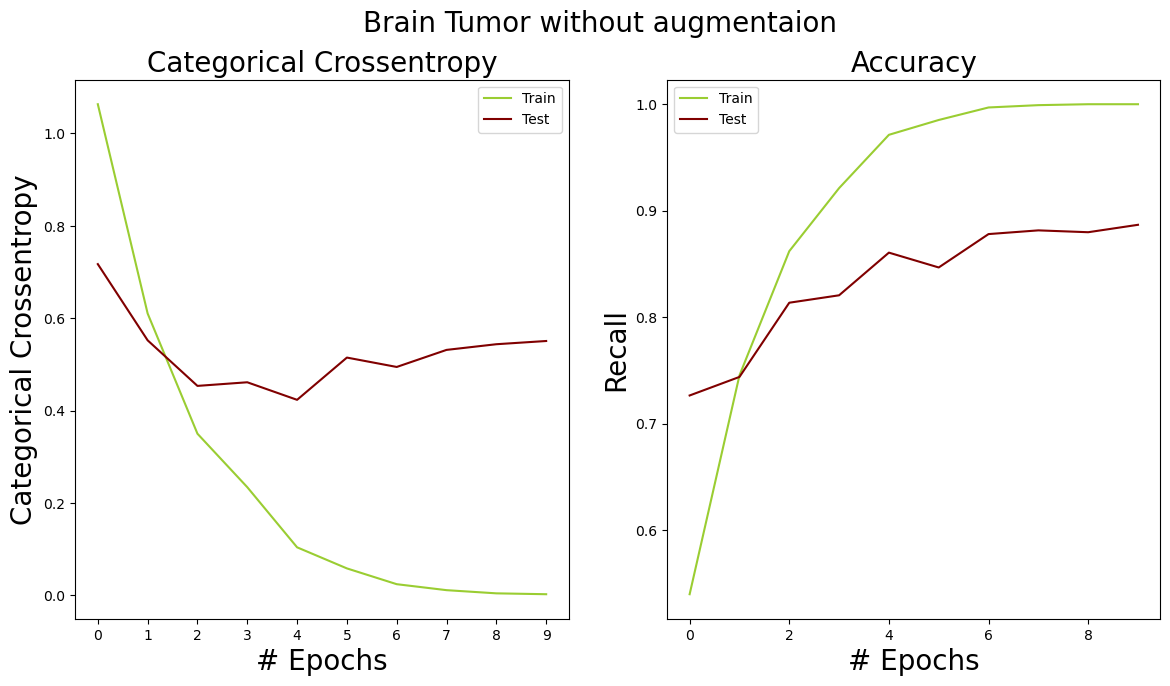

In [10]:
# Plot Crossentropy and Recall y epoch
functions.evaluation_plots(h, 'Brain Tumor without augmentaion')

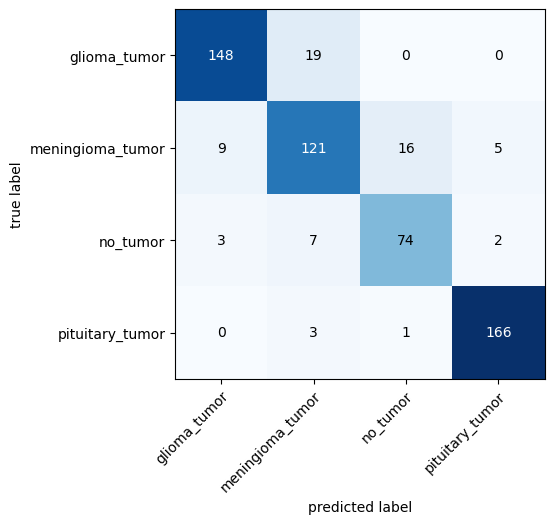

In [11]:
# Plot Confusion Matrix
functions.acc_conf_matrix(bt_val_ds, model)

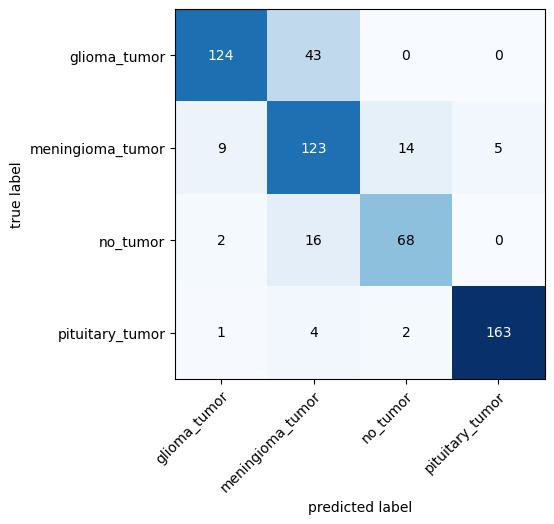